In [3]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.colors import LinearSegmentedColormap

In [4]:
# Load the data
df = pd.read_csv('C:/Users/nerodata/Documents/Python practice/PHSpamSMS/dataset.csv', index_col=0) 
# Remove masked_celphone_number and hashed_celpone_number columns
df = df.drop(['masked_celphone_number', 'hashed_celphone_number'], axis=1)
# Filter to only include Jan 2023 - Jan 2024
df['date'] = pd.to_datetime(df['date'])
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-31')  # Changed from '2024-02-01' to include only January 2024
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

df.head(10)


,date,text,carrier
68,2023-01-06 00:23:46.789,"<REAL NAME>, Everyday is Lucky here W+! Earn m...",Smart/TNT
69,2023-01-07 21:17:48.087,"<REAL NAME>, Be the Lucky player at T1bet! 50%...",Smart/TNT
70,2023-01-08 23:44:05.211,"<REAL NAME>, Don't hesitate to register in our...",Smart/TNT
71,2023-01-09 11:47:46.700,"<REAL NAME>, Tongits go is now available here ...",Smart
72,2023-01-10 18:33:06.028,"<REAL NAME>, The popular Online Casino is in h...",Smart/TNT
73,2023-01-12 11:57:16.804,"JILI FC Free Gift 188 peso! Google ""boom188org...",TNT
74,2023-01-14 19:39:40.415,"<REAL NAME>, JACKPOT CITY has the best gaming ...",Smart/TNT
75,2023-01-15 16:12:51.621,Licensed By Pagcor mLive77 Casino Register Cla...,Smart
76,2023-01-15 18:13:42.783,"jackpot! Ang unang deposito ng 100,000 pesos a...",Smart/TNT
77,2023-01-19 09:43:31.642,"<REAL NAME>, Dito wala kang talo! Maglaro na a...",Smart/TNT


In [5]:
# Double check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 68 to 390
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     323 non-null    datetime64[ns]
 1   text     323 non-null    object        
 2   carrier  323 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 10.1+ KB


### _Time-Series chart with Interpolation_

C:\Users\nerodata\AppData\Local\Temp\ipykernel_13280\2675077558.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unique_y = y[idx]


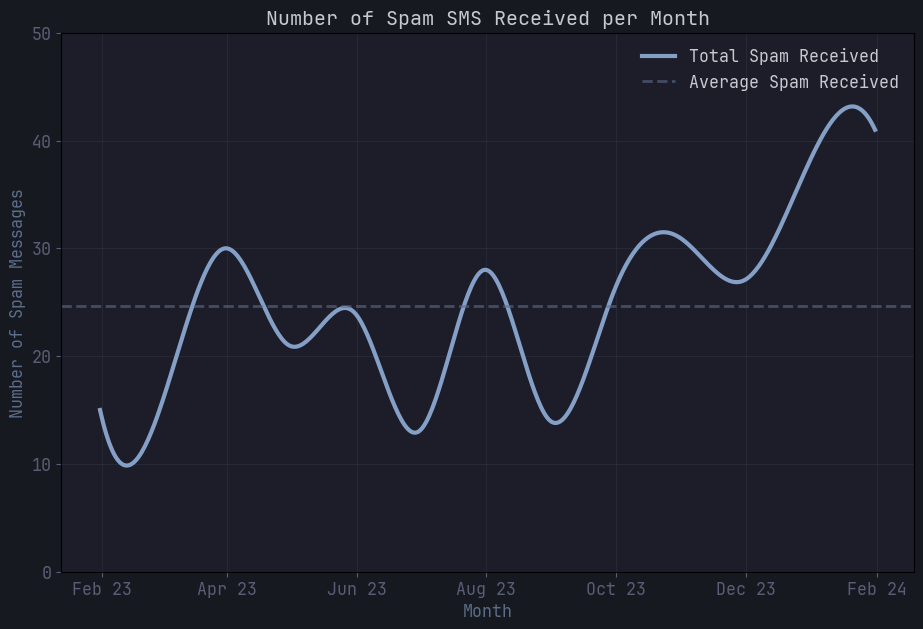

In [6]:
# Resample to monthly frequency
monthly_spam = df.resample('ME', on='date').count()

# Define x as the day of the year and y as the number of spam messages
x = monthly_spam.index
y = monthly_spam['text']

# Drop duplicates from x and corresponding y
unique_x, idx = np.unique(x, return_index=True)
unique_y = y[idx]

# Interpolation Spline
xnew = pd.date_range(start=unique_x.min(), end=unique_x.max(), periods=500)
spl = make_interp_spline(unique_x, unique_y, k=3)  # type: BSpline
ynew = spl(xnew)

# Visual settings
plt.figure(figsize=(11,7))
plt.rcParams['font.family'] = 'JetBrains Mono' 
plt.rcParams['font.size'] = 12 
plt.tick_params(colors='#595E76', which='both') # Text colors
plt.gca().set_facecolor('#1C1D28') # Plot bg color
plt.gcf().set_facecolor('#161920') # Figure bg color
plt.grid(color='#5C6D89', linestyle='-', linewidth=0.5, alpha=0.2) # Gridlines

#Title
plt.title('Number of Spam SMS Received per Month', color='#C6C9D0')
#Labels
plt.xlabel('Month', color='#5C6D89')
plt.ylabel('Number of Spam Messages', color='#5C6D89')

# Customize y-axis range
plt.ylim(0, 50)

# Customize x-axis labels
months = mdates.MonthLocator(interval = 2)  # every 2nd month
fmt = mdates.DateFormatter('%b %y')
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(fmt)

# Plot the data with a label
plt.plot(xnew, ynew, color='#85A0C7' ,linewidth=3, label='Total Spam Received')

# Average line
average = np.mean(ynew)
plt.axhline(y=average, color='#5C6D89', linestyle='--', linewidth=2, alpha=0.6, label='Average Spam Received')

# Legend Settings
legend = plt.legend(frameon=False)
legend.get_frame().set_facecolor('#1C1D28')
for text in legend.get_texts():
    text.set_color('#C6C9D0')

plt.show()

### _Heatmap with Custom Gradient_

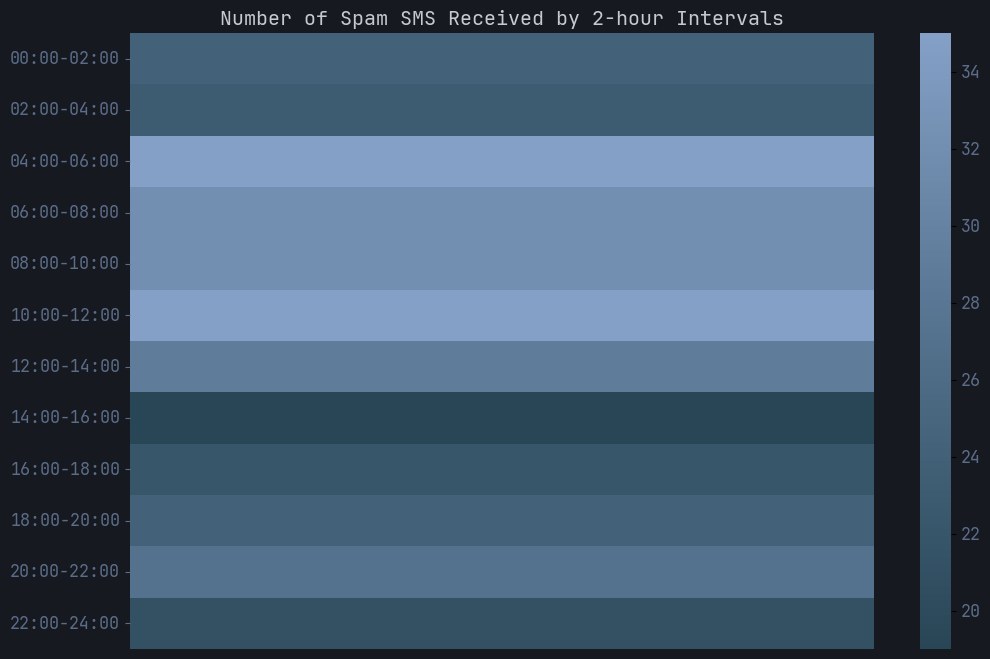

In [7]:
# Extract the hour from the 'date' column and round down to the nearest 2-hour interval
df['hour'] = (df['date'].dt.hour // 2) * 2
hourly_counts = df.groupby('hour').count()
heatmap_data = hourly_counts['text'].values.reshape(-1, 1) # Reshape the data for the heatmap

# Visual settings
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'JetBrains Mono'
plt.rcParams['font.size'] = 12
plt.tick_params(colors='#5C6D89', which='both') # Text colors
plt.gca().set_facecolor('#1C1D28') # Plot bg color
plt.gcf().set_facecolor('#161920') #Figure bg color

#Title
plt.title('Number of Spam SMS Received by 2-hour Intervals', color='#C6C9D0')

#Labels
plt.xlabel('Number of Messages', color='#5C6D89')
plt.ylabel('Hour of Day', color='#C6C9D0')

# Define the colors
cmap_colors = ['#294656', '#345265', '#405f75', '#4d6b84', '#5a7895', '#6885a5', '#7693b6', '#85a0c7']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

# Create the heatmap and get the colorbar
ax = sns.heatmap(heatmap_data, cmap=cmap, yticklabels=[f'{i:02d}:00-{i+2:02d}:00' for i in range(0, 24, 2)], xticklabels=[], cbar_kws={'aspect': 20})
colorbar = ax.collections[0].colorbar

# Change the color of the labels on the colorbar
for label in colorbar.ax.yaxis.get_ticklabels():
    label.set_color('#5C6D89')

plt.show()

### _Time-Series chart by Day of Week, with Min and Max annotations_

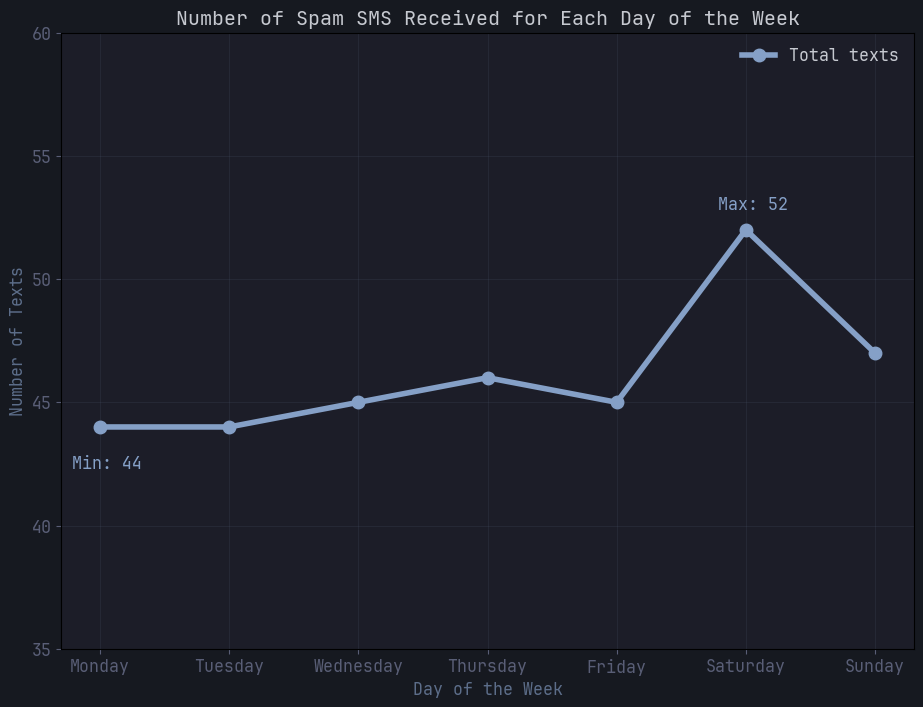

In [8]:
# Set the x-axis as day of week rather than date
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name() # Extract the day of the week from the date
day_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['day_number'] = df['day_of_week'].map(day_order) # Map 'day of week' to corresponding number

# Chart Calculations
average_texts = df.shape[0] / len(df['date'].dt.date.unique())
total_texts = df.groupby(['day_number', 'day_of_week']).size().reset_index(name='count')
total_texts = total_texts.sort_values('day_number')

# Visual Settings
plt.figure(figsize=(11,8))
plt.rcParams['font.family'] = 'JetBrains Mono'
plt.rcParams['font.size'] = 12
plt.tick_params(colors='#595E76', which='both')
plt.gca().set_facecolor('#1C1D28')
plt.gcf().set_facecolor('#161920') 
plt.grid(color='#5C6D89', linestyle='-', linewidth=0.5, alpha=0.2) # Gridlines

#Title
plt.title('Number of Spam SMS Received for Each Day of the Week', color='#C6C9D0')
#Labels
plt.xlabel('Day of the Week', color='#5C6D89')
plt.ylabel('Number of Texts', color='#5C6D89')

# Customize y-axis range
plt.ylim(35, 60)
plt.yticks(range(35, 61, 5))

# Add the average line
plt.plot(total_texts['day_of_week'], total_texts['count'], label='Total texts', marker='o', color='#85A0C7',markersize=9,linewidth=4)

# Legend Settings
legend = plt.legend(frameon=False)
legend.get_frame().set_facecolor('#1C1D28')
for text in legend.get_texts():
    text.set_color('#C6C9D0')
    
# Add min and max annotations
min_value = total_texts['count'].min()
max_value = total_texts['count'].max()
min_day = total_texts.loc[total_texts['count'] == min_value, 'day_of_week'].values[0]
max_day = total_texts.loc[total_texts['count'] == max_value, 'day_of_week'].values[0]
# Plot annotations
plt.annotate(f'Min: {min_value}', (min_day, min_value), textcoords="offset points", xytext=(-20,-30), ha='left', color='#85A0C7', fontsize=12)
plt.annotate(f'Max: {max_value}', (max_day, max_value), textcoords="offset points", xytext=(-20,15), ha='left', color='#85A0C7',fontsize=12)    

    
plt.show()

In [ ]:
# Import libraries for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the set of stop words the first time
nltk.download('punkt')
nltk.download('stopwords')

### _Horizontal Bar Chart_

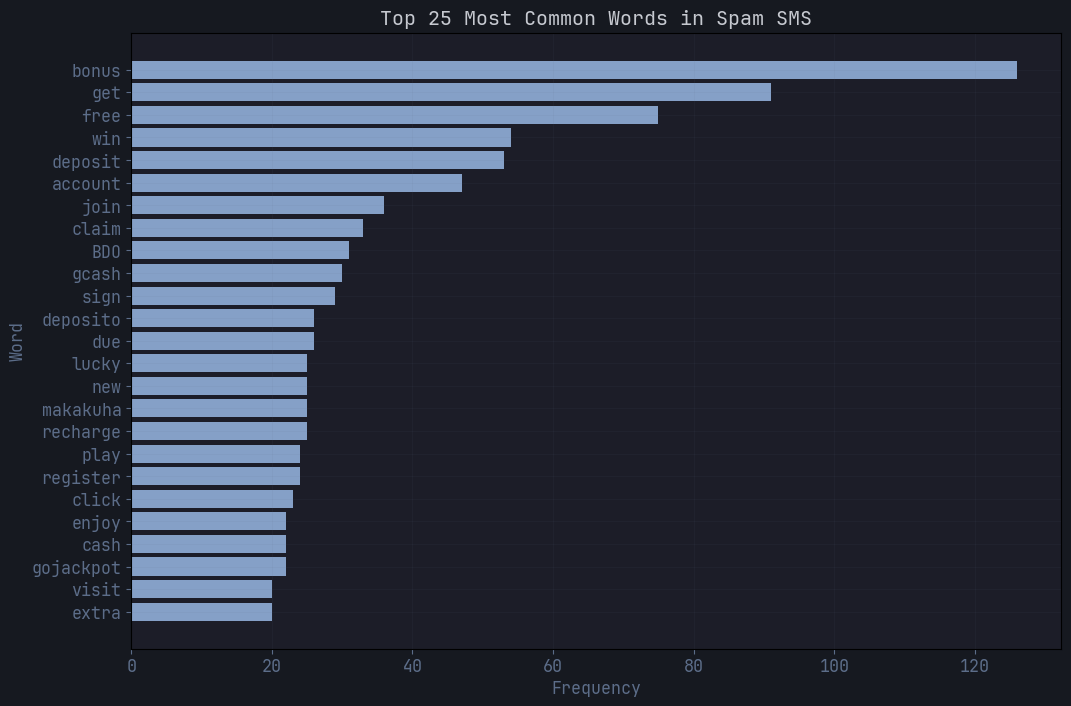

In [12]:
# Configure stop words and related word mappings
stop_words = set(stopwords.words('english'))
spam_mapping = {'CAS1NO': 'casino', 'B0NUS': 'bonus', 'banco': 'BDO'}  # Add more mappings as needed
exclude_words = ['ng', 'real', 'name','sa', 'na', 'https','ang', 'para', 'your','please','iyong', 'para', 'unang','welcome','http','araw', 'daily', 'mga', 'day','de','oro','ngayon','ay','ka','thank','may']  # Add more words as needed
exclude_words = [word.lower() for word in exclude_words]

# Tokenize text and remove stop words
words = []
for text in df['text']:
    for word in word_tokenize(text.lower()):  # Convert text to lowercase
        word = spam_mapping.get(word, word)
        if word.isalpha() and word not in stop_words and word not in exclude_words:
            words.append(word)

# Count frequency of each word
word_counts = Counter(words)
common_words = word_counts.most_common(25)

# Visual Settings
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'JetBrains Mono'
plt.rcParams['font.size'] = 12
plt.tick_params(colors='#5C6D89', which='both')
plt.gca().set_facecolor('#1C1D28') 
plt.gcf().set_facecolor('#161920') 
plt.grid(color='#5C6D89', linestyle='-', linewidth=0.5, alpha=0.1)

#Title
plt.title('Top 25 Most Common Words in Spam SMS', color='#C6C9D0')
#Labels
plt.xlabel('Frequency', color='#5C6D89')
plt.ylabel('Word', color='#5C6D89')

plt.barh([word[0] for word in common_words], [word[1] for word in common_words], color='#85A0C7')
plt.gca().invert_yaxis()
plt.show()

### _Pie Chart_

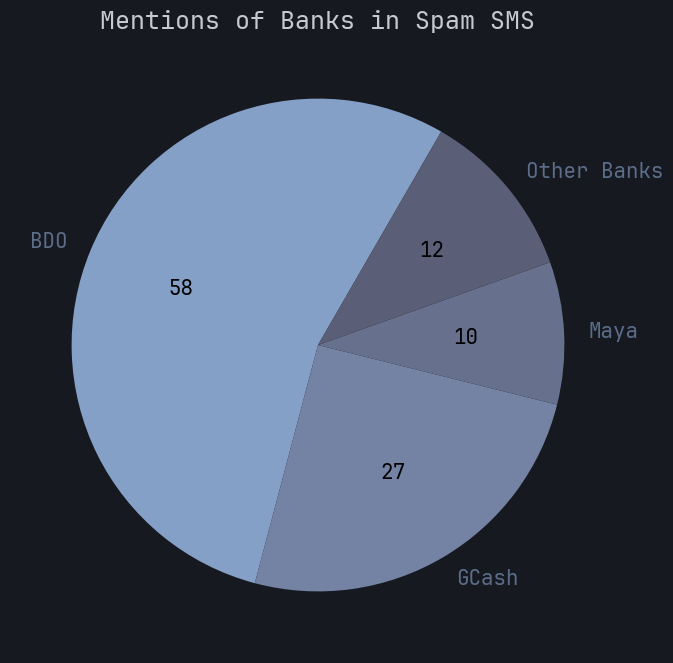

In [10]:
# Mapping bank names 
bank_names = {
    'GCash': ['gcash'],
    'Maya': ['maya'],
    'BDO': ['bdo', 'banco de oro'],
    'landbank': ['landbank'],
    'bpi': ['bpi'],
    'rcbc': ['rcbc'],
    'metrobank' : ['metrobank'],
    'unionbank' : ['unionbank']    
}
               
# Count the presence of each bank
bank_counts = {bank: sum(df['text'].str.contains(name, case=False).sum() for name in names) for bank, names in bank_names.items()}
bank_counts = pd.Series(bank_counts)

sorted_bank_counts = bank_counts.sort_values(ascending=False)
top_bank_counts = sorted_bank_counts[:3]
others = pd.Series([sorted_bank_counts[3:].sum()], index=['Other Banks']) # Sum the counts of the other banks and add them as 'Others'
top_bank_counts = pd.concat([top_bank_counts, others])

# Define a custom function for autopct
def custom_autopct(pct):
    total = sum(top_bank_counts)
    val = int(round(pct*total/100.0))
    return ('%d' % val) if pct > 0 else ''

# Visual Settings
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'JetBrains Mono'
plt.rcParams['font.size'] = 15
plt.tick_params(colors='#595E76', which='both')
plt.gca().set_facecolor('#1C1D28') 
plt.gcf().set_facecolor('#161920') 

# Title
plt.title('Mentions of Banks in Spam SMS', color='#C6C9D0')
# Label Settings
patches, texts, autotexts = plt.pie(top_bank_counts, labels=top_bank_counts.index, autopct=custom_autopct, colors=['#85A0C7', '#7483a4', '#67718d', '#5a5f77'], labeldistance=1.1, textprops={'color': '#5C6D89'}, startangle=60, radius=1)
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

### _Vertical Bar Chart_

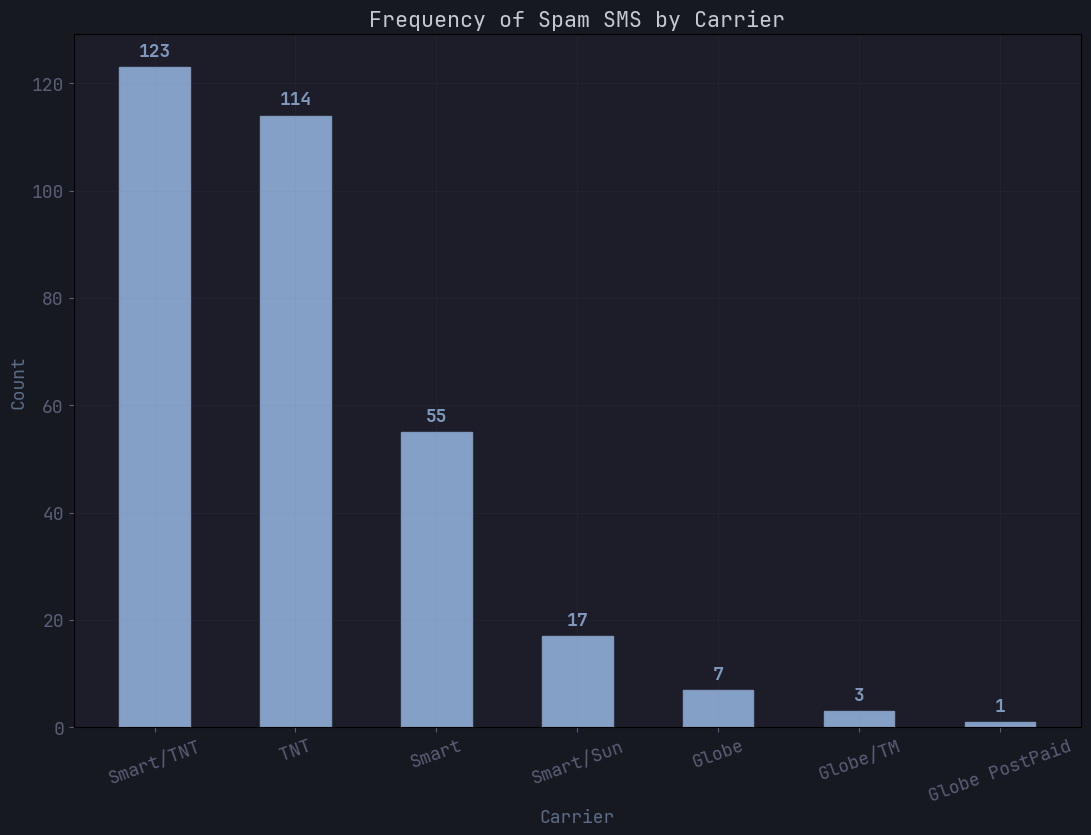

In [11]:
# Exclude 'unknown' category
df_filtered = df[df['carrier'] != '<unknown>']
# Calculate the counts of each carrier
carrier_counts = df_filtered['carrier'].value_counts()

# Visual Settings
plt.figure(figsize=(13, 9))
plt.rcParams['font.family'] = 'JetBrains Mono'
plt.rcParams['font.size'] = 13
plt.tick_params(colors='#595E76', which='both')
plt.gca().set_facecolor('#1C1D28')
plt.gcf().set_facecolor('#161920') 
plt.grid(color='#5C6D89', linestyle='-', linewidth=0.5, alpha=0.1)

# Title
plt.title('Frequency of Spam SMS by Carrier', color='#C6C9D0')
# Labels
plt.xlabel('Carrier', color='#5C6D89')
plt.ylabel('Count', color='#5C6D89')

# Bar Settings
bars = plt.bar(carrier_counts.index, carrier_counts, color='#85A0C7', width=0.5, edgecolor='#7F98BC')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1.5, yval, ha='center', va='bottom', color='#7F98BC', fontsize=13, fontweight='bold')

plt.xticks(rotation=20)
plt.show()